# Dive Prediction - Data

*Predicting Seabird Diving Behaviour from GPS data*

This notebook prepares and formats a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.

More precisely, data have been prepared and selected as follow:

* Trajectories with raw temporal sampling at 1s only
* Gaps have been interpolated linearly (yet there are shorter than 10s)
* Maximal step speed is inferior to 50 m.s-1
* Birds never stay static longer than 10 minutes
* Number of dive in each trajectory is within the following range 1-99

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.trip import * 

In [2]:
 np.random.seed(1)

## load raw data 

In [3]:
# connect to database
conn = sqlite3.connect('/home/amdroy/MEGA/DATA/seabirdbank.db')

In [23]:
request = "SELECT trip, datetime, lon, lat, pressure, fastlog, gaps, step_speed, step_direction FROM dive \
            INNER JOIN trip ON dive.trip = trip.id \
            INNER JOIN bird ON trip.bird = bird.id \
            WHERE bird.species = 'SS' \
            ORDER BY trip, datetime"

data = pd.read_sql_query(request, conn)
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data['dive'] = 0

# convert to boolean
data['gaps'] = (data['gaps']=='TRUE')
data['fastlog'] = (data['fastlog']=='TRUE')

data

,trip,datetime,lon,lat,pressure,fastlog,gaps,step_speed,step_direction,dive
0,F0915_14_SS_T1,2015-10-01 04:31:59,-32.39285,-3.818786,-0.38,False,False,NaN,NaN,0
1,F0915_14_SS_T1,2015-10-01 04:32:20,-32.39235,-3.817632,-0.38,False,False,6.665149,NaN,0
2,F0915_14_SS_T1,2015-10-01 04:32:41,-32.39123,-3.816932,-0.44,False,False,6.982204,34.449370,0
3,F0915_14_SS_T1,2015-10-01 04:33:02,-32.38976,-3.816709,-0.38,False,False,7.878627,23.489520,0
4,F0915_14_SS_T1,2015-10-01 04:33:23,-32.38844,-3.816552,-0.38,False,False,7.019402,1.773116,0
...,...,...,...,...,...,...,...,...,...,...
64655,F0918_3_SS_T2,2018-09-21 13:59:50,-31.75280,-2.362642,-1.54,False,True,0.611004,-83.693100,0
64656,F0918_3_SS_T2,2018-09-21 14:00:14,-31.75226,-2.362853,-1.63,False,True,2.675992,-22.944570,0
64657,F0918_3_SS_T2,2018-09-21 14:00:38,-31.75172,-2.363064,-1.79,False,True,2.675992,0.000003,0
64658,F0918_3_SS_T2,2018-09-21 14:01:02,-31.75118,-2.363275,-1.54,False,True,2.675992,0.000003,0


## filter data

In [24]:
check = pd.read_csv("/home/amdroy/MEGA/DATA/FORMAT/dive_check.csv", sep = ';')
check = check[check.trip.isin(data.trip)]
check

,trip,res_sampling_gps,res_sampling_tdr,nb_sampling_gps,nb_sampling_tdr,total_duration,error_sampling_tdr,error_sampling_gps,gap_sampling_tdr,gap_sampling_gps,dupl_sampling_tdr,dupl_sampling_gps,nb_fastlog_event,dist_start_end,total_distance,max_speed,nb_dive,longest_gap,stop
423,F0915_14_SS_T1,21.0,1.0,2410,50317,13.976667,0,1265,0,0,0,0,621,0.077472,236.821026,19.71725,0,0,69
424,F0915_22_SS_T1,21.0,1.0,1828,38321,10.644444,0,911,0,0,0,0,394,0.155123,190.176369,19.68576,1,0,78
425,F0915_23_SS_T1,21.0,1.0,1744,36684,10.189722,0,797,0,0,0,0,1021,0.007559,136.913936,15.75967,0,0,272
426,F0915_23_SS_T2,22.0,1.0,497,10904,3.028611,0,355,0,0,0,0,251,64.386200,76.623926,16.03750,0,0,41
427,F0915_24_SS_T1,21.0,1.0,853,17988,4.996389,0,354,0,0,0,0,115,0.943048,79.109054,19.92901,0,0,86
428,F0915_24_SS_T2,21.0,1.0,2026,42776,11.881944,0,929,0,0,0,0,460,0.156136,164.973836,16.67048,0,0,335
429,F0915_30_SS_T1,21.0,1.0,2808,57859,16.071667,0,1701,0,0,0,0,1660,0.129267,369.242165,18.36510,35,0,231
430,F0915_31_SS_T1,20.0,1.0,2931,59882,16.633611,0,1547,0,0,0,0,1800,0.178434,354.212728,17.80703,0,0,168
431,F0916_9_SS_T1,15.0,1.0,7270,110331,30.647222,0,3321,0,0,0,0,3816,158.020384,365.421582,18.69831,0,0,2572
432,F0916_14_SS_T1,15.0,1.0,3227,48735,13.537222,0,1361,0,0,0,0,470,0.538006,299.072926,19.20150,0,0,254


In [25]:
# # SV
# list_ok = check.trip[(check.res_sampling_gps == 1) & (check.gap_sampling_tdr == 0) & 
#                      (check.nb_dive > 0) & (check.stop < 600)]
# data = data[data.trip.isin(list_ok)]
# data

In [26]:
# ## LB
# list_ok = check.trip[(check.gap_sampling_tdr == 0) &
#                      (check.res_sampling_gps == 1) & 
#                      (check.nb_sampling_tdr > 1000) &
#                      (check.stop < 3000)]
# data = data[data.trip.isin(list_ok)]
# data

In [18]:
# # SD
# list_ok = check.trip[(check.res_sampling_gps == 15) &(check.nb_dive > 0) & (check.res_sampling_gps <= 15)]
# data = data[data.trip.isin(list_ok)]
# data

,trip,datetime,lon,lat,pressure,fastlog,gaps,step_speed,step_direction,dive
11507,F0417_13_SD_T1,2017-04-26 06:19:10,-32.38774,-3.818652,-0.51,False,False,NaN,NaN,0
11508,F0417_13_SD_T1,2017-04-26 06:19:25,-32.38659,-3.818414,-0.51,False,False,8.681527,NaN,0
11509,F0417_13_SD_T1,2017-04-26 06:19:40,-32.38530,-3.817827,-0.51,False,False,10.495980,-12.747840,0
11510,F0417_13_SD_T1,2017-04-26 06:19:55,-32.38387,-3.817933,-0.44,False,False,10.629350,28.748480,0
11511,F0417_13_SD_T1,2017-04-26 06:20:10,-32.38236,-3.818313,-0.44,False,False,11.521580,9.910214,0
...,...,...,...,...,...,...,...,...,...,...
96558,F0418_26_SD_T2,2018-04-22 14:28:14,-32.39467,-3.813152,0.12,False,False,9.571560,-16.312630,0
96559,F0418_26_SD_T2,2018-04-22 14:28:29,-32.39387,-3.814380,0.12,False,False,10.835960,0.503061,0
96560,F0418_26_SD_T2,2018-04-22 14:28:44,-32.39270,-3.815083,0.18,False,False,10.119910,-26.177740,0
96561,F0418_26_SD_T2,2018-04-22 14:28:59,-32.39202,-3.816421,-0.19,False,False,11.138800,31.933850,0


In [27]:
# SS
list_ok = check.trip[(check.res_sampling_gps == 15) & (check.longest_gap < 100) & (check.nb_fastlog_event > 5)]
data = data[data.trip.isin(list_ok)]
data

,trip,datetime,lon,lat,pressure,fastlog,gaps,step_speed,step_direction,dive
15110,F0916_14_SS_T1,2016-09-21 05:43:09,-32.39317,-3.819388,-0.82,False,False,NaN,NaN,0
15111,F0916_14_SS_T1,2016-09-21 05:43:24,-32.39238,-3.819512,-0.82,False,False,5.914049,NaN,0
15112,F0916_14_SS_T1,2016-09-21 05:43:39,-32.39175,-3.819947,-0.88,False,False,5.715445,25.436930,0
15113,F0916_14_SS_T1,2016-09-21 05:43:54,-32.39090,-3.819524,-0.82,False,False,6.993327,-61.058500,0
15114,F0916_14_SS_T1,2016-09-21 05:44:09,-32.39016,-3.818992,-0.82,False,False,6.795452,-8.847591,0
...,...,...,...,...,...,...,...,...,...,...
39498,F0916_9_SS_T1,2016-09-20 10:38:27,-31.67036,-2.590794,-0.38,False,False,10.639600,-9.256635,0
39499,F0916_9_SS_T1,2016-09-20 10:38:42,-31.67130,-2.591833,-0.44,False,False,10.389080,3.761911,0
39500,F0916_9_SS_T1,2016-09-20 10:38:57,-31.67212,-2.592821,-0.44,False,False,9.512467,-2.445643,0
39501,F0916_9_SS_T1,2016-09-20 10:39:12,-31.67274,-2.593779,-0.44,False,False,8.453577,-6.911488,0


In [28]:
len(data.trip.unique())

6

Total nb of trips: 6


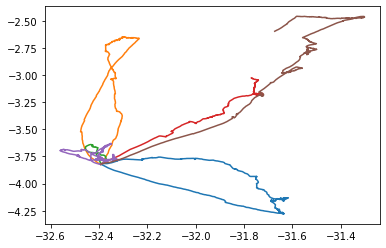

In [29]:
for i in data.trip.unique():
    t = data[data.trip == i]
    
    # compute dives
    trip = Trip(t)
    trip.add_dive(2)
    
#     trip.df['dive'] = 1*trip.df['fastlog']
    
    # fill dive in main table
    data = data.copy()
    data.loc[data.trip == i, 'dive'] = trip.df.dive.values
    
    # plot individual and global plots
    trip.plot('./data/SS/'+ str(i)+'.png')
    plt.plot(np.array(t.lon), np.array(t.lat))
    
print('Total nb of trips: '+ str(len(data.trip.unique())))

In [30]:
data.to_csv('./data/SS_all.csv', index = False)

## split to train, validation, test dataset

In [10]:
data_guanape = data[data.trip.str[:1]=='G']
data = data[data.trip.str[:1]=='P']

In [11]:
data_guanape.to_csv('./data/SV_test_guanape.csv', index = False)

In [12]:
trajs = data.trip.unique()
np.random.shuffle(trajs)
trajs

array(['P1112_30_SV_T1', 'P1112_15_SV_T3', 'P1112_21_SV_T1',
       'P1108_6_SV_T1', 'P1112_15_SV_T4', 'P1113_28_SV_T2',
       'P1112_22_SV_T2', 'P1111_41_SV_T1', 'P1113_28_SV_T3',
       'P1113_28_SV_T1', 'P1112_25_SV_T5', 'P1113_23_SV_T3',
       'P1113_41_SV_T4', 'P1112_27_SV_T1', 'P1112_22_SV_T1',
       'P1112_20_SV_T2', 'P1112_19_SV_T6', 'P1112_18_SV_T5',
       'P1111_27_SV_T4', 'P1112_19_SV_T5', 'P1113_23_SV_T4',
       'P1112_26_SV_T3', 'P1112_37_SV_T1', 'P1108_4_SV_T2',
       'P1113_29_SV_T1', 'P1112_15_SV_T1', 'P1112_25_SV_T1',
       'P1112_14_SV_T1', 'P1112_24_SV_T4', 'P1112_18_SV_T3',
       'P1113_23_SV_T2', 'P1113_24_SV_T3', 'P1113_15_SV_T1',
       'P1112_29_SV_T2', 'P1109_21_SV_T7', 'P1108_46_SV_T4',
       'P1113_18_SV_T4', 'P1112_35_SV_T2', 'P1113_33_SV_T2',
       'P1112_19_SV_T3', 'P1112_4_SV_T2', 'P1112_33_SV_T2',
       'P1112_38_SV_T1', 'P1112_4_SV_T4', 'P1112_31_SV_T2',
       'P1112_31_SV_T5', 'P1112_24_SV_T3', 'P1112_19_SV_T7',
       'P1112_24_SV_T1', 'P1

In [13]:
nb_train = round(0.7 * len(data.trip.unique()))
nb_validation = round(0.2 * len(data.trip.unique()))
nb_test = round(0.1 * len(data.trip.unique()))

In [14]:
train_trajs = trajs[0:nb_train]
validation_trajs = trajs[nb_train:(nb_train+nb_validation)]
test_trajs = trajs[(nb_train+nb_validation):(nb_train+nb_validation+nb_test)]

In [15]:
data_train = data[data.trip.isin(train_trajs)]
data_validation = data[data.trip.isin(validation_trajs)]
data_test = data[data.trip.isin(test_trajs)]

In [16]:
data_train.to_csv('./data/SV_train.csv', index = False)
data_validation.to_csv('./data/SV_validation.csv', index = False)
data_test.to_csv('./data/SV_test.csv', index = False)

In [17]:
(nb_train, nb_validation, nb_test)

(93, 27, 13)